Datos confirmados:
  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369

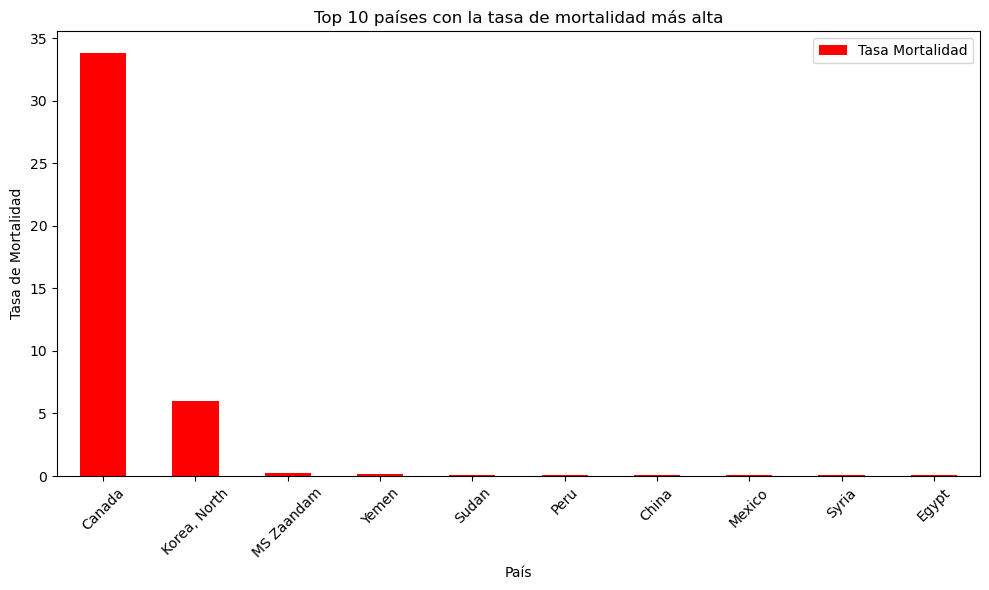

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url_confirmados = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_muertes = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_recuperados = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

df_confirmados = pd.read_csv(url_confirmados)
df_muertes = pd.read_csv(url_muertes)
df_recuperados = pd.read_csv(url_recuperados)


print("Datos confirmados:")
print(df_confirmados.head())

print("\nDatos de muertes:")
print(df_muertes.head())

print("\nDatos de recuperados:")
print(df_recuperados.head())

pais = 'India'

# Filtrar los datos para el país seleccionado
df_confirmados_pais = df_confirmados[df_confirmados['Country/Region'] == pais].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)

# Calcular el promedio de casos confirmados por día
promedio_confirmados_por_dia = df_confirmados_pais.mean(axis=1)
print(f"\nPromedio de casos confirmados por día en {pais}:")
print(promedio_confirmados_por_dia)

df_muertes_suma = df_muertes.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).sum(axis=1)
df_confirmados_suma = df_confirmados.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).sum(axis=1)

paises = df_muertes['Country/Region']


df_tasa_mortalidad = pd.DataFrame({
    'Pais': paises,
    'Tasa Mortalidad': df_muertes_suma / df_confirmados_suma
})


df_tasa_mortalidad = df_tasa_mortalidad.dropna()


df_tasa_mortalidad_sorted = df_tasa_mortalidad.sort_values(by='Tasa Mortalidad', ascending=False)


print("\nTop 10 países con la tasa de mortalidad más alta:")
print(df_tasa_mortalidad_sorted.head(10))


df_tasa_mortalidad_sorted.head(10).plot(kind='bar', x='Pais', y='Tasa Mortalidad', figsize=(10, 6), color='red')
plt.title('Top 10 países con la tasa de mortalidad más alta')
plt.xlabel('País')
plt.ylabel('Tasa de Mortalidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

